In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import math

##### Read CSV files

In [40]:
historical_transaction_data = pd.read_csv('Historical-transaction-data.csv')
store_info = pd.read_csv('Store-info.csv')
testing_data = pd.read_csv('Testing-data.csv')

In [13]:
historical_transaction_data

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5
...,...,...,...,...,...,...,...
473969,NECTO 1.5L,2021-12-09T00:00:00.000Z,NaN,X21A,SHOP056,440,3
473970,LEMONADE 1.5L,2021-12-02T00:00:00.000Z,NaN,LV2L,SHOP018,220,2
473971,FIT O ORANGE 200ML,2021-11-19T00:00:00.000Z,NaN,VC4O,SHOP077,210,4
473972,CREAM SODA 1.5L,2021-12-03T00:00:00.000Z,NaN,MSBQ,SHOP077,440,3


In [24]:
store_info

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low
...,...,...,...
119,SHOP087,527,NaN
120,SHOP050,411,NaN
121,SHOP061,699,NaN
122,SHOP056,597,NaN


In [41]:
testing_data

,shop_id
0,SHOP046
1,SHOP024
2,SHOP023
3,SHOP097
4,SHOP044
5,SHOP030
6,SHOP038
7,SHOP029
8,SHOP096
9,SHOP092


In [18]:
per_shop_item_price = pd.read_csv('item_price.csv',index_col=0)
per_shop_item_sold_quantity = pd.read_csv('total_quantity.csv',index_col=0)

In [19]:
per_shop_item_price

,shop_id,ORANGE BARLEY 1.5L-2021/10/15,ORANGE BARLEY 1.5L-2021/10/16,ORANGE BARLEY 1.5L-2021/10/17,ORANGE BARLEY 1.5L-2021/10/18,ORANGE BARLEY 1.5L-2021/10/19,ORANGE BARLEY 1.5L-2021/10/20,ORANGE BARLEY 1.5L-2021/10/21,ORANGE BARLEY 1.5L-2021/10/22,ORANGE BARLEY 1.5L-2021/10/23,...,LIME CRUSH JUICE 1L-2021/12/6,LIME CRUSH JUICE 1L-2021/12/7,LIME CRUSH JUICE 1L-2021/12/8,LIME CRUSH JUICE 1L-2021/12/9,LIME CRUSH JUICE 1L-2021/12/10,LIME CRUSH JUICE 1L-2021/12/11,LIME CRUSH JUICE 1L-2021/12/12,LIME CRUSH JUICE 1L-2021/12/13,LIME CRUSH JUICE 1L-2021/12/14,LIME CRUSH JUICE 1L-2021/12/15
0,SHOP047,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
1,SHOP009,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
2,SHOP083,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
3,SHOP117,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
4,SHOP042,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,SHOP087,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
20,SHOP050,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
21,SHOP061,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
22,SHOP056,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0


In [20]:
per_shop_item_sold_quantity

,shop_id,ORANGE BARLEY 1.5L-2021/10/15 total_quantity,ORANGE BARLEY 1.5L-2021/10/16 total_quantity,ORANGE BARLEY 1.5L-2021/10/17 total_quantity,ORANGE BARLEY 1.5L-2021/10/18 total_quantity,ORANGE BARLEY 1.5L-2021/10/19 total_quantity,ORANGE BARLEY 1.5L-2021/10/20 total_quantity,ORANGE BARLEY 1.5L-2021/10/21 total_quantity,ORANGE BARLEY 1.5L-2021/10/22 total_quantity,ORANGE BARLEY 1.5L-2021/10/23 total_quantity,...,LIME CRUSH JUICE 1L-2021/12/6 total_quantity,LIME CRUSH JUICE 1L-2021/12/7 total_quantity,LIME CRUSH JUICE 1L-2021/12/8 total_quantity,LIME CRUSH JUICE 1L-2021/12/9 total_quantity,LIME CRUSH JUICE 1L-2021/12/10 total_quantity,LIME CRUSH JUICE 1L-2021/12/11 total_quantity,LIME CRUSH JUICE 1L-2021/12/12 total_quantity,LIME CRUSH JUICE 1L-2021/12/13 total_quantity,LIME CRUSH JUICE 1L-2021/12/14 total_quantity,LIME CRUSH JUICE 1L-2021/12/15 total_quantity
0,SHOP047,14,3,9,14,4,8,14,7,11,...,0,0,0,0,0,0,0,0,0,0
1,SHOP009,11,23,17,21,35,26,23,19,28,...,0,0,0,0,0,0,0,0,0,0
2,SHOP083,12,20,23,24,24,24,15,19,29,...,0,0,0,0,0,0,0,0,0,0
3,SHOP117,19,15,23,31,48,22,27,20,24,...,0,0,0,0,0,0,0,0,0,0
4,SHOP042,13,16,15,22,28,6,11,15,18,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,SHOP087,21,12,19,15,10,4,4,6,14,...,0,0,0,0,0,0,0,0,0,0
120,SHOP050,35,38,26,35,75,36,29,32,53,...,0,0,0,0,0,0,0,0,0,0
121,SHOP061,18,39,15,10,20,23,19,15,21,...,0,0,0,0,0,0,0,0,0,0
122,SHOP056,44,35,43,36,42,29,29,24,37,...,0,0,0,0,0,0,0,0,0,0


In [26]:
train_shops = pd.read_csv('training-Store-info.csv')
train_shops

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low
...,...,...,...
95,SHOP124,606,High
96,SHOP012,336,Low
97,SHOP093,705,High
98,SHOP004,516,Low


In [27]:
train1 = pd.merge(train_shops,per_shop_item_price,how='left',on='shop_id')
train1

,shop_id,shop_area_sq_ft,shop_profile,ORANGE BARLEY 1.5L-2021/10/15,ORANGE BARLEY 1.5L-2021/10/16,ORANGE BARLEY 1.5L-2021/10/17,ORANGE BARLEY 1.5L-2021/10/18,ORANGE BARLEY 1.5L-2021/10/19,ORANGE BARLEY 1.5L-2021/10/20,ORANGE BARLEY 1.5L-2021/10/21,...,LIME CRUSH JUICE 1L-2021/12/6,LIME CRUSH JUICE 1L-2021/12/7,LIME CRUSH JUICE 1L-2021/12/8,LIME CRUSH JUICE 1L-2021/12/9,LIME CRUSH JUICE 1L-2021/12/10,LIME CRUSH JUICE 1L-2021/12/11,LIME CRUSH JUICE 1L-2021/12/12,LIME CRUSH JUICE 1L-2021/12/13,LIME CRUSH JUICE 1L-2021/12/14,LIME CRUSH JUICE 1L-2021/12/15
0,SHOP047,528,Moderate,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
1,SHOP009,676,High,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
2,SHOP083,676,Low,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
3,SHOP117,676,Low,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
4,SHOP042,676,Low,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SHOP124,606,High,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
96,SHOP012,336,Low,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
97,SHOP093,705,High,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
98,SHOP004,516,Low,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0


In [28]:
train2 = pd.merge(train1,per_shop_item_sold_quantity,how='left',on='shop_id')
train2

,shop_id,shop_area_sq_ft,shop_profile,ORANGE BARLEY 1.5L-2021/10/15,ORANGE BARLEY 1.5L-2021/10/16,ORANGE BARLEY 1.5L-2021/10/17,ORANGE BARLEY 1.5L-2021/10/18,ORANGE BARLEY 1.5L-2021/10/19,ORANGE BARLEY 1.5L-2021/10/20,ORANGE BARLEY 1.5L-2021/10/21,...,LIME CRUSH JUICE 1L-2021/12/6 total_quantity,LIME CRUSH JUICE 1L-2021/12/7 total_quantity,LIME CRUSH JUICE 1L-2021/12/8 total_quantity,LIME CRUSH JUICE 1L-2021/12/9 total_quantity,LIME CRUSH JUICE 1L-2021/12/10 total_quantity,LIME CRUSH JUICE 1L-2021/12/11 total_quantity,LIME CRUSH JUICE 1L-2021/12/12 total_quantity,LIME CRUSH JUICE 1L-2021/12/13 total_quantity,LIME CRUSH JUICE 1L-2021/12/14 total_quantity,LIME CRUSH JUICE 1L-2021/12/15 total_quantity
0,SHOP047,528,Moderate,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
1,SHOP009,676,High,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
2,SHOP083,676,Low,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
3,SHOP117,676,Low,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
4,SHOP042,676,Low,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SHOP124,606,High,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
96,SHOP012,336,Low,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
97,SHOP093,705,High,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
98,SHOP004,516,Low,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0


#### missing values

In [29]:
cols_with_missing_val_train = [col for col in train2.columns if train2[col].isnull().any()]
cols_with_missing_val_train,len(cols_with_missing_val_train)

([], 0)

##### object columns

In [30]:
s = (train2.dtypes=='object')
object_cols = list(s[s].index)
object_cols

['shop_id', 'shop_profile']

In [42]:
test1 = pd.merge(testing_data,store_info,how='left',on='shop_id')
test1

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP046,545,NaN
1,SHOP024,676,NaN
2,SHOP023,617,NaN
3,SHOP097,310,NaN
4,SHOP044,715,NaN
5,SHOP030,530,NaN
6,SHOP038,411,NaN
7,SHOP029,597,NaN
8,SHOP096,676,NaN
9,SHOP092,617,NaN


In [43]:
test2 = pd.merge(test1,per_shop_item_price,how='left',on='shop_id')
test2

,shop_id,shop_area_sq_ft,shop_profile,ORANGE BARLEY 1.5L-2021/10/15,ORANGE BARLEY 1.5L-2021/10/16,ORANGE BARLEY 1.5L-2021/10/17,ORANGE BARLEY 1.5L-2021/10/18,ORANGE BARLEY 1.5L-2021/10/19,ORANGE BARLEY 1.5L-2021/10/20,ORANGE BARLEY 1.5L-2021/10/21,...,LIME CRUSH JUICE 1L-2021/12/6,LIME CRUSH JUICE 1L-2021/12/7,LIME CRUSH JUICE 1L-2021/12/8,LIME CRUSH JUICE 1L-2021/12/9,LIME CRUSH JUICE 1L-2021/12/10,LIME CRUSH JUICE 1L-2021/12/11,LIME CRUSH JUICE 1L-2021/12/12,LIME CRUSH JUICE 1L-2021/12/13,LIME CRUSH JUICE 1L-2021/12/14,LIME CRUSH JUICE 1L-2021/12/15
0,SHOP046,545,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
1,SHOP024,676,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
2,SHOP023,617,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
3,SHOP097,310,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
4,SHOP044,715,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
5,SHOP030,530,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
6,SHOP038,411,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
7,SHOP029,597,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
8,SHOP096,676,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
9,SHOP092,617,NaN,220,220,440,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0


In [62]:
test3 = pd.merge(test2,per_shop_item_sold_quantity,how='left',on='shop_id')
test3

,shop_id,shop_area_sq_ft,shop_profile,ORANGE BARLEY 1.5L-2021/10/15,ORANGE BARLEY 1.5L-2021/10/16,ORANGE BARLEY 1.5L-2021/10/17,ORANGE BARLEY 1.5L-2021/10/18,ORANGE BARLEY 1.5L-2021/10/19,ORANGE BARLEY 1.5L-2021/10/20,ORANGE BARLEY 1.5L-2021/10/21,...,LIME CRUSH JUICE 1L-2021/12/6 total_quantity,LIME CRUSH JUICE 1L-2021/12/7 total_quantity,LIME CRUSH JUICE 1L-2021/12/8 total_quantity,LIME CRUSH JUICE 1L-2021/12/9 total_quantity,LIME CRUSH JUICE 1L-2021/12/10 total_quantity,LIME CRUSH JUICE 1L-2021/12/11 total_quantity,LIME CRUSH JUICE 1L-2021/12/12 total_quantity,LIME CRUSH JUICE 1L-2021/12/13 total_quantity,LIME CRUSH JUICE 1L-2021/12/14 total_quantity,LIME CRUSH JUICE 1L-2021/12/15 total_quantity
0,SHOP046,545,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
1,SHOP024,676,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
2,SHOP023,617,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
3,SHOP097,310,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
4,SHOP044,715,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
5,SHOP030,530,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
6,SHOP038,411,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
7,SHOP029,597,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
8,SHOP096,676,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
9,SHOP092,617,NaN,220,220,440,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0


In [47]:
cols_with_missing_val_train = [col for col in test3.columns if test3[col].isnull().any()]
cols_with_missing_val_train,len(cols_with_missing_val_train)

(['shop_profile'], 1)

In [48]:
s = (test3.dtypes=='object')
object_cols = list(s[s].index)
object_cols

['shop_id', 'shop_profile']

### label encode

In [51]:
from sklearn.preprocessing import LabelEncoder

label_train2 = train2.copy()
label_encoder = LabelEncoder()

label_train2['shop_profile'] = label_encoder.fit_transform(train2['shop_profile'])

In [53]:
train2

,shop_id,shop_area_sq_ft,shop_profile,ORANGE BARLEY 1.5L-2021/10/15,ORANGE BARLEY 1.5L-2021/10/16,ORANGE BARLEY 1.5L-2021/10/17,ORANGE BARLEY 1.5L-2021/10/18,ORANGE BARLEY 1.5L-2021/10/19,ORANGE BARLEY 1.5L-2021/10/20,ORANGE BARLEY 1.5L-2021/10/21,...,LIME CRUSH JUICE 1L-2021/12/6 total_quantity,LIME CRUSH JUICE 1L-2021/12/7 total_quantity,LIME CRUSH JUICE 1L-2021/12/8 total_quantity,LIME CRUSH JUICE 1L-2021/12/9 total_quantity,LIME CRUSH JUICE 1L-2021/12/10 total_quantity,LIME CRUSH JUICE 1L-2021/12/11 total_quantity,LIME CRUSH JUICE 1L-2021/12/12 total_quantity,LIME CRUSH JUICE 1L-2021/12/13 total_quantity,LIME CRUSH JUICE 1L-2021/12/14 total_quantity,LIME CRUSH JUICE 1L-2021/12/15 total_quantity
0,SHOP047,528,Moderate,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
1,SHOP009,676,High,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
2,SHOP083,676,Low,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
3,SHOP117,676,Low,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
4,SHOP042,676,Low,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SHOP124,606,High,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
96,SHOP012,336,Low,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
97,SHOP093,705,High,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
98,SHOP004,516,Low,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0


In [80]:
label_train2

,shop_id,shop_area_sq_ft,shop_profile,ORANGE BARLEY 1.5L-2021/10/15,ORANGE BARLEY 1.5L-2021/10/16,ORANGE BARLEY 1.5L-2021/10/17,ORANGE BARLEY 1.5L-2021/10/18,ORANGE BARLEY 1.5L-2021/10/19,ORANGE BARLEY 1.5L-2021/10/20,ORANGE BARLEY 1.5L-2021/10/21,...,LIME CRUSH JUICE 1L-2021/12/6 total_quantity,LIME CRUSH JUICE 1L-2021/12/7 total_quantity,LIME CRUSH JUICE 1L-2021/12/8 total_quantity,LIME CRUSH JUICE 1L-2021/12/9 total_quantity,LIME CRUSH JUICE 1L-2021/12/10 total_quantity,LIME CRUSH JUICE 1L-2021/12/11 total_quantity,LIME CRUSH JUICE 1L-2021/12/12 total_quantity,LIME CRUSH JUICE 1L-2021/12/13 total_quantity,LIME CRUSH JUICE 1L-2021/12/14 total_quantity,LIME CRUSH JUICE 1L-2021/12/15 total_quantity
0,SHOP047,528,2,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
1,SHOP009,676,0,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
2,SHOP083,676,1,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
3,SHOP117,676,1,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
4,SHOP042,676,1,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SHOP124,606,0,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
96,SHOP012,336,1,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
97,SHOP093,705,0,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
98,SHOP004,516,1,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0


#### data split

In [55]:
from sklearn.model_selection import train_test_split

X = label_train2.copy()
y = X.shop_profile
X.drop(['shop_profile'],axis=1,inplace=True)
X.drop(['shop_id'],axis=1,inplace=True)

X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.8,random_state=0) # 80% as training set and 20 % as validation set

In [84]:
X_train

,shop_area_sq_ft,ORANGE BARLEY 1.5L-2021/10/15,ORANGE BARLEY 1.5L-2021/10/16,ORANGE BARLEY 1.5L-2021/10/17,ORANGE BARLEY 1.5L-2021/10/18,ORANGE BARLEY 1.5L-2021/10/19,ORANGE BARLEY 1.5L-2021/10/20,ORANGE BARLEY 1.5L-2021/10/21,ORANGE BARLEY 1.5L-2021/10/22,ORANGE BARLEY 1.5L-2021/10/23,...,LIME CRUSH JUICE 1L-2021/12/6 total_quantity,LIME CRUSH JUICE 1L-2021/12/7 total_quantity,LIME CRUSH JUICE 1L-2021/12/8 total_quantity,LIME CRUSH JUICE 1L-2021/12/9 total_quantity,LIME CRUSH JUICE 1L-2021/12/10 total_quantity,LIME CRUSH JUICE 1L-2021/12/11 total_quantity,LIME CRUSH JUICE 1L-2021/12/12 total_quantity,LIME CRUSH JUICE 1L-2021/12/13 total_quantity,LIME CRUSH JUICE 1L-2021/12/14 total_quantity,LIME CRUSH JUICE 1L-2021/12/15 total_quantity
43,706,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
62,810,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
3,676,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
71,617,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
45,617,220,220,220,220,220,220,660,220,220,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,336,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
67,520,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
64,617,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
47,617,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0


In [85]:
y_train

43    2
62    0
3     1
71    2
45    1
     ..
96    1
67    1
64    0
47    2
44    2
Name: shop_profile, Length: 80, dtype: int32

In [63]:
test4 = test3.copy()
test4

,shop_id,shop_area_sq_ft,shop_profile,ORANGE BARLEY 1.5L-2021/10/15,ORANGE BARLEY 1.5L-2021/10/16,ORANGE BARLEY 1.5L-2021/10/17,ORANGE BARLEY 1.5L-2021/10/18,ORANGE BARLEY 1.5L-2021/10/19,ORANGE BARLEY 1.5L-2021/10/20,ORANGE BARLEY 1.5L-2021/10/21,...,LIME CRUSH JUICE 1L-2021/12/6 total_quantity,LIME CRUSH JUICE 1L-2021/12/7 total_quantity,LIME CRUSH JUICE 1L-2021/12/8 total_quantity,LIME CRUSH JUICE 1L-2021/12/9 total_quantity,LIME CRUSH JUICE 1L-2021/12/10 total_quantity,LIME CRUSH JUICE 1L-2021/12/11 total_quantity,LIME CRUSH JUICE 1L-2021/12/12 total_quantity,LIME CRUSH JUICE 1L-2021/12/13 total_quantity,LIME CRUSH JUICE 1L-2021/12/14 total_quantity,LIME CRUSH JUICE 1L-2021/12/15 total_quantity
0,SHOP046,545,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
1,SHOP024,676,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
2,SHOP023,617,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
3,SHOP097,310,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
4,SHOP044,715,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
5,SHOP030,530,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
6,SHOP038,411,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
7,SHOP029,597,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
8,SHOP096,676,NaN,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
9,SHOP092,617,NaN,220,220,440,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0


In [64]:
test4.drop(['shop_id'],axis=1,inplace=True)
test4.drop(['shop_profile'],axis=1,inplace=True)
test4

,shop_area_sq_ft,ORANGE BARLEY 1.5L-2021/10/15,ORANGE BARLEY 1.5L-2021/10/16,ORANGE BARLEY 1.5L-2021/10/17,ORANGE BARLEY 1.5L-2021/10/18,ORANGE BARLEY 1.5L-2021/10/19,ORANGE BARLEY 1.5L-2021/10/20,ORANGE BARLEY 1.5L-2021/10/21,ORANGE BARLEY 1.5L-2021/10/22,ORANGE BARLEY 1.5L-2021/10/23,...,LIME CRUSH JUICE 1L-2021/12/6 total_quantity,LIME CRUSH JUICE 1L-2021/12/7 total_quantity,LIME CRUSH JUICE 1L-2021/12/8 total_quantity,LIME CRUSH JUICE 1L-2021/12/9 total_quantity,LIME CRUSH JUICE 1L-2021/12/10 total_quantity,LIME CRUSH JUICE 1L-2021/12/11 total_quantity,LIME CRUSH JUICE 1L-2021/12/12 total_quantity,LIME CRUSH JUICE 1L-2021/12/13 total_quantity,LIME CRUSH JUICE 1L-2021/12/14 total_quantity,LIME CRUSH JUICE 1L-2021/12/15 total_quantity
0,545,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
1,676,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
2,617,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
3,310,220,220,220,220,220,220,220,440,220,...,0,0,0,0,0,0,0,0,0,0
4,715,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
5,530,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
6,411,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
7,597,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
8,676,220,220,220,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0
9,617,220,220,440,220,220,220,220,220,220,...,0,0,0,0,0,0,0,0,0,0


#### model selection and evaluation

c:\Python37\cv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:16:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.00488
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00088
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00068
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00051
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00037
Feature: 24, Score: 0.00044

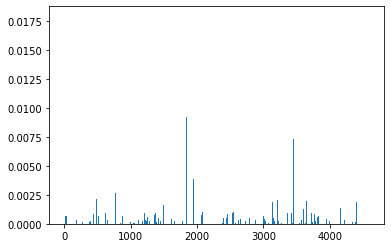

Confusion Matrix: 
[[6 1 1]
 [1 4 0]
 [0 2 5]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.57      0.80      0.67         5
           2       0.83      0.71      0.77         7

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.78      0.75      0.76        20

F1 Score:  0.7452991452991453


In [87]:
# xgboost classifier

from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=1000, learning_rate=0.005)
model.fit(X_train,y_train)

importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# random forest classifier
from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=1500, random_state=0)
# model.fit(X_train,y_train)

# predictions = model.predict(X_val)

# Catboost classifier
# from catboost import CatBoostClassifier
# model = CatBoostClassifier(iterations=850,learning_rate=0.01)
# model.fit(X_train,y_train)


from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score,auc,precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score


# plot the Receiver Operating Characteristic (ROC) and calculate the Area Under the ROC curve(AUC_score)

preds_prob = model.predict_proba(X_val)
predictions = model.predict(X_val)

print("Confusion Matrix: ")
print(confusion_matrix(y_val,predictions)) # confusion matrix

print(classification_report(y_val,predictions)) # classification report

f1_score = f1_score(y_val,predictions,average='macro') #F1 score
print("F1 Score: ",f1_score)



In [96]:
importance
important_features = np.nonzero(importance)[0]
important_features,len(important_features)

(array([   0,   15,   18, ..., 4454, 4459, 4460], dtype=int64), 1365)

In [105]:
new_X_train = X_train.iloc[:,important_features]
new_X_val = X_val.iloc[:,important_features]
new_X_train

,shop_area_sq_ft,ORANGE BARLEY 1.5L-2021/10/29,ORANGE BARLEY 1.5L-2021/11/1,ORANGE BARLEY 1.5L-2021/11/3,ORANGE BARLEY 1.5L-2021/11/6,ORANGE BARLEY 1.5L-2021/11/7,ORANGE BARLEY 1.5L-2021/11/10,ORANGE BARLEY 1.5L-2021/11/11,ORANGE BARLEY 1.5L-2021/11/12,ORANGE BARLEY 1.5L-2021/11/13,...,GINGER BEER 400ML-2021/10/31 total_quantity,GINGER BEER 400ML-2021/11/7 total_quantity,GINGER BEER 400ML-2021/11/9 total_quantity,GINGER BEER 400ML-2021/11/17 total_quantity,GINGER BEER 400ML-2021/11/18 total_quantity,GINGER BEER 400ML-2021/11/24 total_quantity,GINGER BEER 400ML-2021/11/27 total_quantity,GINGER BEER 400ML-2021/12/5 total_quantity,GINGER BEER 400ML-2021/12/10 total_quantity,GINGER BEER 400ML-2021/12/11 total_quantity
43,706,0,0,220,0,0,0,0,0,220,...,0,0,4,0,0,0,1,0,0,2
62,810,0,220,440,220,0,0,0,220,220,...,0,0,0,5,0,2,0,0,0,4
3,676,0,0,0,0,220,220,220,0,220,...,0,0,11,0,0,0,2,2,0,0
71,617,0,220,0,220,0,0,660,0,0,...,0,0,0,0,1,1,0,0,2,2
45,617,220,0,0,0,0,220,0,220,220,...,1,0,1,2,0,0,2,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,336,0,0,0,0,220,0,0,0,220,...,0,0,0,0,0,0,2,0,2,0
67,520,220,0,220,220,0,220,0,220,220,...,11,0,0,0,0,0,0,1,0,0
64,617,220,220,220,0,220,0,0,220,220,...,2,2,0,0,10,0,1,2,2,4
47,617,220,220,0,220,0,0,0,0,220,...,2,0,0,0,0,0,0,1,0,2


c:\Python37\cv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:38:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.00488
Feature: 1, Score: 0.00088
Feature: 2, Score: 0.00068
Feature: 3, Score: 0.00051
Feature: 4, Score: 0.00037
Feature: 5, Score: 0.00044
Feature: 6, Score: 0.00040
Feature: 7, Score: 0.00024
Feature: 8, Score: 0.00321
Feature: 9, Score: 0.00058
Feature: 10, Score: 0.00064
Feature: 11, Score: 0.00010
Feature: 12, Score: 0.00040
Feature: 13, Score: 0.00092
Feature: 14, Score: 0.00025
Feature: 15, Score: 0.00015
Feature: 16, Score: 0.00050
Feature: 17, Score: 0.00057
Feature: 18, Score: 0.00065
Feature: 19, Score: 0.00039
Feature: 20, Score: 0.00046
Feature: 21, Score: 0.00008
Feature: 22, Score: 0.00071
Feature: 23, Score: 0.00077
Feature: 24, Score: 0.00156

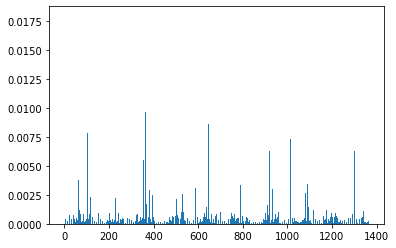

Confusion Matrix: 
[[6 1 1]
 [1 4 0]
 [0 2 5]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.57      0.80      0.67         5
           2       0.83      0.71      0.77         7

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.78      0.75      0.76        20

F1 Score:  0.7452991452991453


In [106]:
# xgboost classifier

from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=1000, learning_rate=0.005)
model.fit(new_X_train,y_train)

importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# random forest classifier
from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=1500, random_state=0)
# model.fit(X_train,y_train)

# predictions = model.predict(X_val)

# Catboost classifier
# from catboost import CatBoostClassifier
# model = CatBoostClassifier(iterations=850,learning_rate=0.01)
# model.fit(X_train,y_train)


from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score,auc,precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score


# plot the Receiver Operating Characteristic (ROC) and calculate the Area Under the ROC curve(AUC_score)

preds_prob = model.predict_proba(new_X_val)
predictions = model.predict(new_X_val)

print("Confusion Matrix: ")
print(confusion_matrix(y_val,predictions)) # confusion matrix

print(classification_report(y_val,predictions)) # classification report

f1_score = f1_score(y_val,predictions,average='macro') #F1 score
print("F1 Score: ",f1_score)



In [77]:
### save the model--------------------------------------------------------
import joblib

filename = "checkpoints/xgboost_1000_0.005.joblib"
joblib.dump(model, filename)

['checkpoints/xgboost_1000_0.005.joblib']

#### predict values for test set

In [78]:
preds_test = model.predict(test4)
print(preds_test)

convertion = {0:'High',1:'Low',2:'Moderate'}
new_preds_test = []
for i in preds_test:
    new_preds_test.append(convertion[i])
print(new_preds_test)


[1 2 2 2 1 1 1 2 2 1 2 1 2 0 2 1 1 2 1 2 2 1 0 2]
['Low', 'Moderate', 'Moderate', 'Moderate', 'Low', 'Low', 'Low', 'Moderate', 'Moderate', 'Low', 'Moderate', 'Low', 'Moderate', 'High', 'Moderate', 'Low', 'Low', 'Moderate', 'Low', 'Moderate', 'Moderate', 'Low', 'High', 'Moderate']


In [79]:
output = pd.DataFrame({'shop_id':test3.shop_id,'shop_profile': new_preds_test})
output.to_csv('submit/Datastorm.csv',index=False)